In [7]:
import librosa
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw 

def load_song(path, offset=0, duration=None):
    y, sr = librosa.load(path, offset=offset, duration=duration)
    return y, sr

def extract_pcp(y, sr, n_fft=2048, hop_length=256):
    stft = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
    pcp = librosa.feature.chroma_stft(S=stft, sr=sr, n_chroma=1)
    return pcp

def compare_songs(pcp1, pcp2):
    distance, _ = fastdtw(pcp1.T, pcp2.T, dist=euclidean)
    return distance

# 1º Cenário
# y1, sr1 = load_song('./Belchior - Como Nossos Pais.wav')
# # y2, sr2 = load_song('./Belchior - Como Nossos Pais.wav')
# y2, sr2 = load_song('./Elis - Como Nossos Pais.wav')

# 2º Cenário
# y1, sr1 = load_song('./Under Pressure (Remastered 2011).wav')
# y2, sr2 = load_song('./Vanilla Ice - Ice Ice baby (Single edit).wav')

# 3º Cenário
# y1, sr1 = load_song('./ratos.wav')
# y2, sr2 = load_song('./eminem.wav')

#4º Cenário
y1, sr1 = load_song('./Belchior - Como Nossos Pais.wav')
y2, sr2 = load_song('./Vanilla Ice - Ice Ice baby (Single edit).wav')

pcp1 = extract_pcp(y1, sr1)
pcp2 = extract_pcp(y2, sr2)

similarity_score = compare_songs(pcp1, pcp2)

print(f"Distância entre as músicas (quanto menor, mais similar): {similarity_score}")


Distância entre as músicas (quanto menor, mais similar): 253.0


              precision    recall  f1-score   support

       cover       0.50      1.00      0.67         1
    original       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



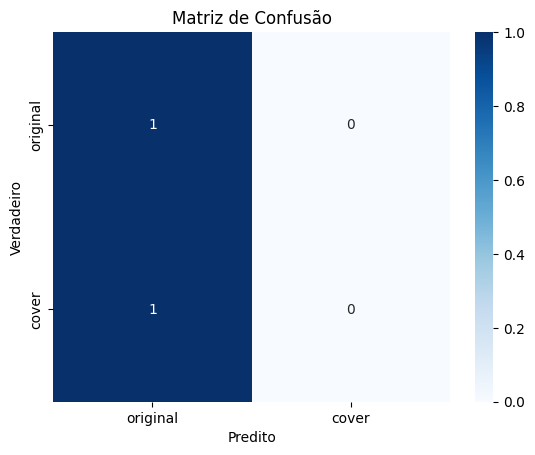

In [10]:
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Função para extrair características de uma música
def extract_features(file_path):
    y, sr = librosa.load(file_path)
    pcp = librosa.feature.chroma_stft(y=y, sr=sr)
    return np.mean(pcp, axis=1)  # Exemplo: média dos PCA para cada música

# Listar seus arquivos de música e suas classes
music_files = ['ratos.wav', 'ratos_cover.wav', "Belchior - Como Nossos Pais.wav", "Elis - Como Nossos Pais.wav", 'Under Pressure (Remastered 2011).wav', "Vanilla Ice - Ice Ice baby (Single edit).wav"]  # Adicione seus arquivos
labels = ['original', 'cover', 'original', 'cover', 'original', 'cover']  # Adicione as classes correspondentes

# Extrair características e preparar os dados
features = np.array([extract_features(f) for f in music_files])
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Treinamento do modelo
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Avaliação
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['original', 'cover'], yticklabels=['original', 'cover'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()


In [ ]:
import librosa
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw  # Alinhamento dinâmico

# Função para segmentar a música em trechos de 8 compassos
def segment_in_bars(y, sr, bpm, bars=8):
    # Calcular a duração de um compasso (4/4) em segundos
    seconds_per_beat = 60.0 / bpm
    compasso_duration = seconds_per_beat * 4
    segment_duration = compasso_duration * bars
    
    # Segmentar a música em 8 compassos
    segment_length = int(segment_duration * sr)
    segments = librosa.util.frame(y, frame_length=segment_length, hop_length=segment_length)
    return segments

# Função para carregar a música e extrair os segmentos de 8 compassos
def load_and_segment(path, bars=8):
    y, sr = librosa.load(path)
    bpm = librosa.beat.tempo(y=y, sr=sr)  # Correção aqui
    segments = segment_in_bars(y, sr, bpm, bars=bars)
    return segments, sr

# Função para comparar dois segmentos de músicas usando DTW
def compare_segments(segment1, segment2, sr):
    # Extrair as características tonais usando chroma_stft
    chroma1 = librosa.feature.chroma_stft(y=segment1, sr=sr)
    chroma2 = librosa.feature.chroma_stft(y=segment2, sr=sr)
    
    # Usar DTW para comparar os chroma features
    distance, _ = fastdtw(chroma1.T, chroma2.T, dist=euclidean)
    return distance

# Carregar e segmentar as duas músicas
# segments1, sr1 = load_and_segment('./Under Pressure (Remastered 2011).wav')
# segments2, sr2 = load_and_segment('./Vanilla Ice - Ice Ice baby (Single edit).wav')

segments1, sr1 = load_and_segment('./Belchior - Como Nossos Pais.wav')
segments2, sr2 = load_and_segment('./Elis - Como Nossos Pais.wav')

# Comparar os primeiros segmentos de 8 compassos das duas músicas
similarity_scores = []
for i in range(min(len(segments1.T), len(segments2.T))):  # Comparar até o número de segmentos menores
    distance = compare_segments(segments1[:, i], segments2[:, i], sr1)
    similarity_scores.append(distance)

# Exibir as similaridades para cada par de segmentos
for i, score in enumerate(similarity_scores):
    print(f"Distância entre o segmento {i+1}: {score}")

In [1]:
import librosa
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw  # Alinhamento dinâmico

# Função para carregar a música
def load_song(path):
    y, sr = librosa.load(path)
    return y, sr

# Carregar e extrair características da primeira música
y1, sr1 = load_song('./Belchior - Como Nossos Pais.wav')
mfcc1 = librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=13, n_fft=2048, hop_length=256, dct_type=2, center=True)
stft1 = np.abs(librosa.stft(y1, n_fft=2048, hop_length=512))
pcp1 = librosa.feature.chroma_stft(S=stft1, sr=sr1, n_chroma=12)

# Carregar e extrair características da segunda música
# y2, sr2 = load_song(librosa.ex('nutcracker'))  # Usei a amostra do librosa
y2, sr2 = load_song('./Elis - Como Nossos Pais.wav')
mfcc2 = librosa.feature.mfcc(y=y2, sr=sr2, n_mfcc=13, n_fft=2048, hop_length=256, dct_type=2, center=True)
stft2 = np.abs(librosa.stft(y2, n_fft=2048, hop_length=512))
pcp2 = librosa.feature.chroma_stft(S=stft2, sr=sr2, n_chroma=12)

# Comparar os MFCCs e PCPs
distance_mfcc, _ = fastdtw(mfcc1.T, mfcc2.T, dist=euclidean)
distance_pcp, _ = fastdtw(pcp1.T, pcp2.T, dist=euclidean)

print(f"Distância entre os MFCCs: {distance_mfcc}")
print(f"Distância entre os PCPs: {distance_pcp}")


Distância entre os MFCCs: 3047685.3492084267
Distância entre os PCPs: 12422.034886926087
